<a href="https://colab.research.google.com/github/adrita23/Machine-Learning-Assignments/blob/main/ML_Fall_21_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 1 
#Date: 22-09-2021
#Author: Adrita Anika

In [ ]:
#Question 1 

## part a: Data Exploration

### a.i: Using the training data, compute the number of samples belonging to each class.  Are the classes equally distributed?


Question 1: part a


*   Mounting Drive
*   Importing Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML HW/data_train.csv', header=None) 

In [ ]:
data.head()


,0,1,2,3
0,38,66,0,1
1,38,66,11,1
2,38,60,1,1
3,38,67,5,1
4,39,66,0,2


In [ ]:
#a.i : compute the number of samples belonging to each class

no_of_samples = data.loc[:,3].value_counts()

print("The number of samples for class- 1 is ", no_of_samples[1])
print("The number of samples for class- 2 is ", no_of_samples[2])

The number of samples for class- 1 is  173
The number of samples for class- 2 is  72


a.i : The classes are not equally distributed

Text(0.5, 1.0, 'Number of positive axillary lymph nodes')

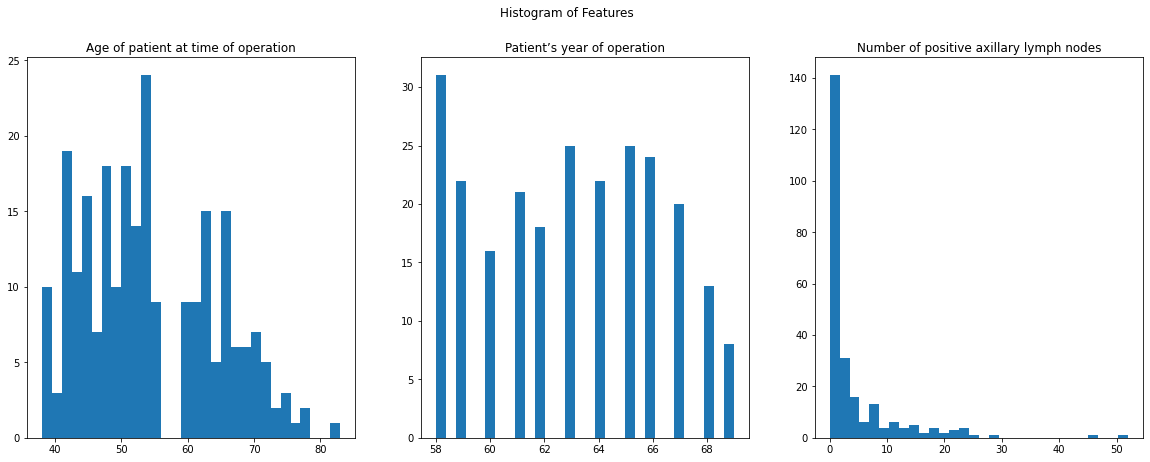

In [76]:
#a.ii : plot the histogram of eachfeature (i.e.,  3 total histograms).

fig, axs = plt.subplots(1,3, figsize =(20, 7))
fig.suptitle('Histogram of Features')

feature_1 = axs[0].hist(data.loc[:,0], bins= 30)
axs[0].set_title("Age of patient at time of operation")
feature_2 = axs[1].hist(data.loc[:,1], bins= 30)
axs[1].set_title('Patient’s year of operation')
feature_3 = axs[2].hist(data.loc[:,2], bins= 30)
axs[2].set_title('Number of positive axillary lymph nodes')

a.ii. 
1.  Age of patient at time of operation has multimodal distrubution
2.  Patient’s year of operation has uniform/ unimodal??
3.  Number of positive axillary lymph nodes detected has unimodal distribution

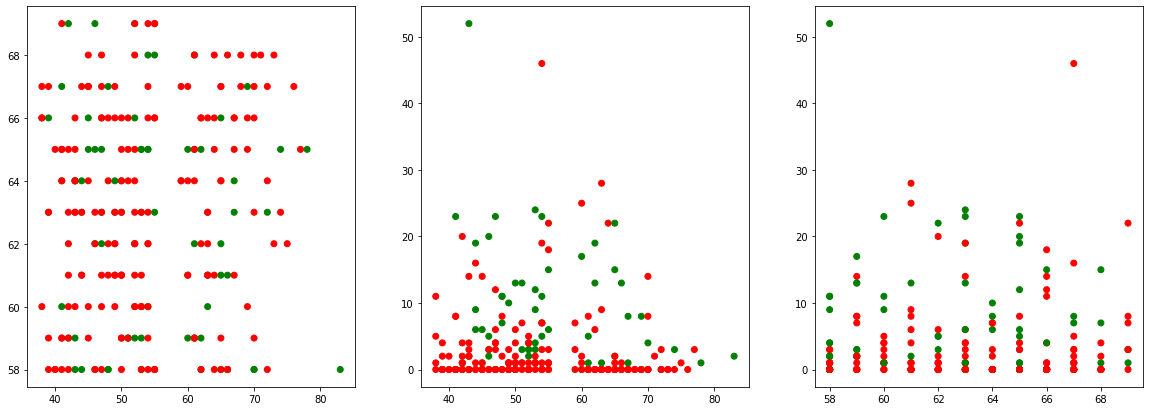

In [102]:
#a.iii
'''
data_num = data.loc[:,3].to_numpy
idx_1 = np.where(data.loc[:,3]==1)
idx_2 = np.where(data.loc[:,3] ==2)
'''
fig, ax = plt.subplots(1,3, figsize= (20,7)) 
colors = {1: 'red', 2: 'green'}

ax[0].scatter(data.loc[:,0], data.loc[:, 1], c = data.loc[:,3].map(colors))
ax[1].scatter(data.loc[:,0], data.loc[:, 2], c = data.loc[:,3].map(colors))
ax[2].scatter(data.loc[:,1], data.loc[:, 2], c = data.loc[:,3].map(colors))



In [96]:
print(idx_1)
print(idx_)

(array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  16,
        17,  18,  19,  20,  21,  22,  25,  26,  27,  28,  29,  30,  31,
        36,  37,  38,  39,  40,  41,  42,  46,  47,  48,  49,  53,  54,
        55,  56,  57,  58,  63,  64,  65,  69,  70,  71,  72,  73,  74,
        75,  76,  80,  81,  82,  83,  86,  87,  88,  89,  90,  91,  92,
        93,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 108, 109,
       110, 111, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 132,
       133, 134, 135, 136, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 164, 165, 166,
       167, 171, 172, 173, 174, 175, 176, 180, 181, 182, 183, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 201, 202, 203,
       204, 205, 206, 209, 210, 211, 214, 215, 216, 217, 218, 219, 221,
       222, 223, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 237,
       239, 240, 241, 242]),)
(array([  4,  13,  14,  15,  23, 

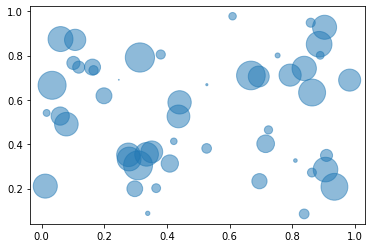

In [77]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()